In [2]:
#Symptoms checker
#Objective: Predict disease for the symptoms of the patient

In [3]:
#Import dataset from local machine
import pandas as pd
import seaborn as sb
from matplotlib.pyplot import scatter as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix


In [4]:
data = pd.read_csv('symptoms.csv')

In [5]:
data.shape

(4920, 133)

In [6]:
#DATA INTERPRETATION
#Check first 5(default) values in dataset
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
#Check last 5(default) values in dataset
data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [8]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
#Statistical information about dataset
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Inorder to get unique elements from a columns
data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
#DATA CLEANING
#Delete the useless data from dataset, here No useless coloumns to delete
data.dropna(inplace=True)  #to drop null values if any

In [12]:
#DATA ANALYSIS

In [13]:
#COUNTPLOT 
#for knowing size of Species
import seaborn as sb

In [14]:
#Replace 'object' categorical data with numerical
#Create a dictionary for the values to be replaced
classes={'Fungal infection':0,'Allergy':1,
         'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,'Peptic ulcer diseae':5, 'AIDS':6, 'Diabetes ':7,
       'Gastroenteritis':8, 'Bronchial Asthma':9, 'Hypertension ':10, 'Migraine':11,
       'Cervical spondylosis':12, 'Paralysis (brain hemorrhage)':13, 'Jaundice':14,
       'Malaria':15, 'Chicken pox':16, 'Dengue':17, 'Typhoid':18, 'hepatitis A':19,
       'Hepatitis B':20, 'Hepatitis C':21, 'Hepatitis D':22, 'Hepatitis E':23,
       'Alcoholic hepatitis':24, 'Tuberculosis':25, 'Common Cold':26, 'Pneumonia':27,
       'Dimorphic hemmorhoids(piles)':28, 'Heart attack':29, 'Varicose veins':30,
       'Hypothyroidism':31, 'Hyperthyroidism':32, 'Hypoglycemia':33,
       'Osteoarthristis':34, 'Arthritis':35,
       '(vertigo) Paroymsal  Positional Vertigo':36, 'Acne':37,
       'Urinary tract infection':38, 'Psoriasis':39, 'Impetigo':40}

data.replace({'prognosis':classes},inplace=True)

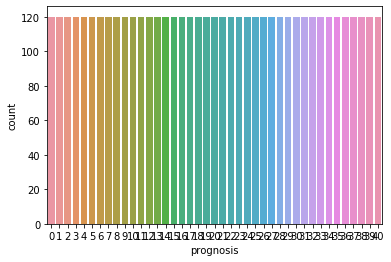

In [15]:
sb.countplot(data['prognosis'])

In [16]:
data['prognosis'].value_counts()

39    120
33    120
25    120
21    120
17    120
13    120
9     120
5     120
1     120
40    120
36    120
32    120
28    120
24    120
20    120
16    120
12    120
8     120
4     120
29    120
37    120
35    120
2     120
31    120
27    120
23    120
19    120
15    120
11    120
7     120
3     120
38    120
34    120
30    120
26    120
22    120
18    120
14    120
10    120
6     120
0     120
Name: prognosis, dtype: int64

In [20]:
data.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.351936
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.079612
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.253230
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.113211
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.240568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.247315
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.260331
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.260331
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.260331


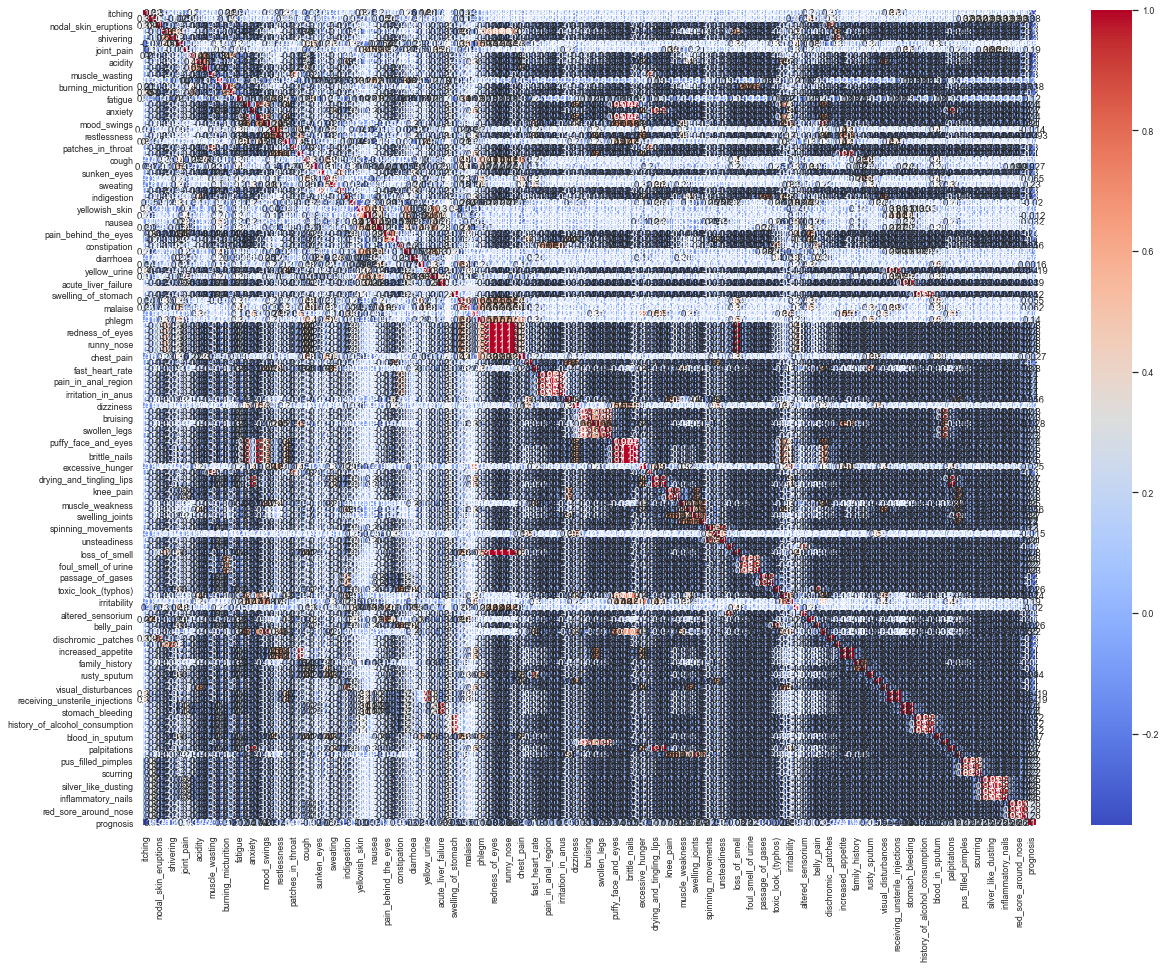

In [21]:
plt.subplots(figsize=(20,15))
sb.set(font_scale=0.8)
x=sb.heatmap(data.corr(),annot=True,cmap='coolwarm')  #now it shows correlation between the attributes
plt.show()

In [22]:
#CREATE ARRAYS
#x=features, y=target
x=data.iloc[:,:-1].values 
y=data.iloc[:,-1].values  

In [23]:
x

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [24]:
y

array([ 0,  0,  0, ..., 38, 39, 40], dtype=int64)

In [25]:
 for i in range(1,1000):
           print(i)
           x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=i)
           from sklearn.linear_model import LogisticRegression
           logreg=LogisticRegression()   #creating object
           logreg.fit(x_train,y_train)
           loregaccuracy=logreg.score(x_test,y_test)
           print(loregaccuracy*100)

#x_train,x_test,y_train,y_test=tts(x,y,train_size=0.8,random_state=42)

1
100.0
2
100.0
3
100.0
4
100.0
5
100.0
6


KeyboardInterrupt: 

In [39]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.8,random_state=2)

In [27]:
#Check size of train and test data
print(x_train.shape)

(3936, 132)


In [28]:
print(x_test.shape)

(984, 132)


In [29]:
print(y_train.shape)

(3936,)


In [30]:
print(y_test.shape)

(984,)


In [31]:
#Select the algorithm
#LOGISTIC REGRESSION
#Library: sklearn
#Class  : linear_model
#Algo.  : Logistic_Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [32]:
#creating object
logreg=LogisticRegression() #function used=fit(arrays), training set of x and y are arrays
#learning step (give data to model to learn)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#Testing step (give new data and test algo efficienccy)
#1.Accuracy fnctn: score(arrays) compares x_test and y_test where here y_test is expcted result 

loregaccuracy=logreg.score(x_test,y_test)
loregaccuracy*100

100.0

In [34]:
logregpred=logreg.predict(x_test)
logregpred  #shows x_test predicted values

array([11, 22, 16, 35, 25, 21, 12, 27, 32,  4, 21, 25, 37, 14, 23, 16, 13,
        8,  9,  8, 13, 24, 12, 23, 21, 33,  7, 19, 14, 13,  3, 19, 18, 15,
       21,  1, 31, 20, 11,  7, 19, 32, 39, 13, 11,  8, 38,  6, 27, 16, 28,
       15, 38, 34, 28, 23, 24, 35,  8, 15, 38, 25, 15, 20, 12,  1, 29, 33,
        4,  3, 10, 11, 34, 27,  7,  6, 16,  4,  8, 17, 29, 37, 20,  7, 30,
        5, 16, 22, 17, 18, 30, 26, 24,  4,  6, 26, 11, 18, 18, 24, 18, 17,
       33, 32, 20, 39, 21, 23, 31, 35, 10, 26, 27, 29, 40, 18, 22,  0,  5,
        7, 17, 31,  0, 14, 23, 35, 34,  8,  6,  4, 10, 14, 33, 39,  7, 23,
       24, 39, 24, 26, 26, 21,  6, 35,  1, 25, 33, 36, 36, 17, 34, 13, 36,
       38, 13, 33, 39, 34,  0,  3, 15, 34, 35, 34, 37, 24, 11, 33,  2, 28,
       11, 29, 37, 39, 33, 13, 36,  0, 20, 35, 34, 12,  9, 16,  0, 23,  5,
       32, 21, 17,  4, 24, 15,  9, 10, 30, 33, 20, 18,  3, 29, 32, 15,  9,
        8, 30, 18, 12, 19, 22, 35, 35,  7,  9, 23, 15, 33, 11, 35,  4,  0,
       34, 37, 14, 24, 26

In [ ]:
#Predict : Pass new values 
#Predict function: predict(values)

In [35]:
#compare right vs wrong predictions
#y_test has actual answer from 0 to 40 of different diseses and x_test has what it actually predicted 
#here its comparing those 2 to know how many matches and how many do not

from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(y_test,logregpred)
conmat

array([[26,  0,  0, ...,  0,  0,  0],
       [ 0, 19,  0, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64)

In [36]:
 import pickle
 file_name=open('symptomIdentifier.pkl','wb')   #write binary file
 model_name=logreg
 pickle.dump(model_name,file_name)

In [37]:
loaded_model=pickle.load(open('symptomIdentifier.pkl','rb'))

In [38]:
loaded_model.score(x_test,y_test)

1.0